In [1]:
%load_ext autoreload
%autoreload 2

### Extracting data from downloaded files

In [46]:
from src.data_wrangling import *
import matplotlib.pyplot as plt

In [47]:
data_dir = 'CLA Datasets'
save_as = 'dataset_CLA_nonaugmented.pkl'

create_dataset(data_dir,save_as)

Reading CLA Datasets\CLA-SubjectJ-170504-3St-LRHand-Inter.mat

Reading CLA Datasets\CLA-SubjectJ-170508-3St-LRHand-Inter.mat

Error Reading CLA Datasets\CLA-SubjectJ-170508-3St-LRHand-Inter.mat

Reading CLA Datasets\CLA-SubjectJ-170510-3St-LRHand-Inter.mat

Error Reading CLA Datasets\CLA-SubjectJ-170510-3St-LRHand-Inter.mat

Reading CLA Datasets\CLASubjectA1601083StLRHand.mat

Reading CLA Datasets\CLASubjectB1510193StLRHand.mat

Reading CLA Datasets\CLASubjectB1510203StLRHand.mat

Reading CLA Datasets\CLASubjectB1512153StLRHand.mat

Reading CLA Datasets\CLASubjectC1511263StLRHand.mat

Reading CLA Datasets\CLASubjectC1512163StLRHand.mat

Reading CLA Datasets\CLASubjectC1512233StLRHand.mat

Reading CLA Datasets\CLASubjectD1511253StLRHand.mat

Reading CLA Datasets\CLASubjectE1512253StLRHand.mat

Reading CLA Datasets\CLASubjectE1601193StLRHand.mat

Reading CLA Datasets\CLASubjectE1601223StLRHand.mat

Reading CLA Datasets\CLASubjectF1509163StLRHand.mat

Reading CLA Datasets\CLASubjectF15091

### Technical Validation

Plotting left and right hand motor imagery for one of the subjects shown in the study and making sure that ERP curve has same form. Instructions for how these plots were generated on page 9 of Kaya et al. 

Only testing one one, getting from signal onset to 1.5 seconds after.

In [2]:
from src.data_wrangling import *
from src.dataset_wrappers import *
from src.preprocessing import *

In [3]:
#SubjectE-151225
trials_val,labels_val = technical_validation_dataset = load_dataset('Technical Validation Data.pkl')

In [4]:
marker_dict = {
    1:'left',
    2:'right'
}

#Organizing the whole list of signals into left and right into each entry of the dictionary, and then also a seperate dict for ERP curve we plot after
group_dict,averaged_group_dict = organize_into_groups(marker_dict,trials_val,labels_val,average_signals=True)

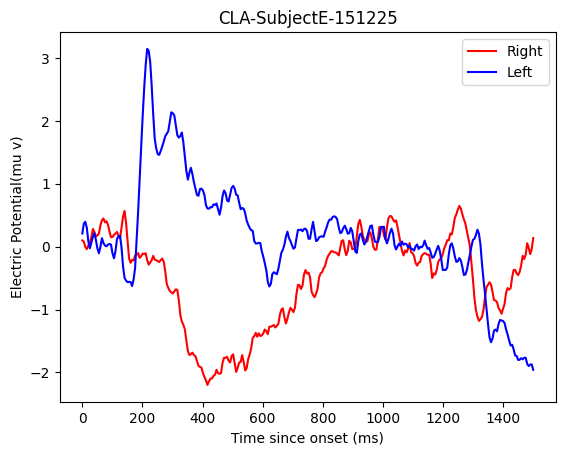

In [5]:
subject_name = 'CLA-SubjectE-151225'

t = np.linspace(start=0,stop=1500,num=300)
plt.plot(t,averaged_group_dict['right'][0],color='red')
plt.plot(t,averaged_group_dict['left'][0],color='blue')

plt.xlabel('Time since onset (ms)')
plt.ylabel('Electric Potential(mu v)')

plt.legend(['Right','Left'])

plt.title(subject_name);

Done from signal onset to 1.5 seconds after. Range is +/- 3 microvolts for channel C3, as mentioned by study. Can compare the above figure with the figure on page 9 for mentiond subject directly. 

General form matches for the above subject. Data parsing seems to have been done correctly. 

### Power Spectrum for above ERP Curve

In [6]:
from scipy.signal import periodogram

In [7]:
#Just doing C3 for technical validation to compare with Kaya et. al
psd_right = periodogram(averaged_group_dict['right'][0],fs=200)
psd_left = periodogram(averaged_group_dict['left'][0],fs=200)

In [8]:
data_indices = psd_right[0]

mu_start = np.argmax(data_indices >= 8)
mu_end = np.argmax(data_indices >= 13)

relevant_indices = data_indices[mu_start:mu_end]

relevant_data_right = psd_right[1][mu_start:mu_end]
relevant_data_left = psd_left[1][mu_start:mu_end]

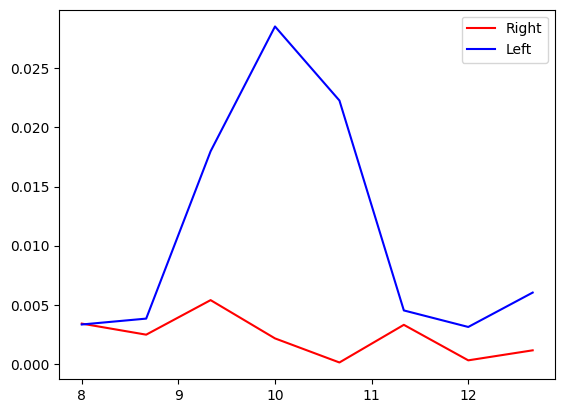

In [9]:
plt.plot(relevant_indices,relevant_data_right,color='red');
plt.plot(relevant_indices,relevant_data_left,color='blue');

plt.legend(['Right','Left']);

### Auto-Encoder Pre-Training

In [158]:
from src.models.CAE import ConvolutionalAutoEncoder
import tensorflow as tf
import os

import matplotlib.pyplot as plt
import numpy as np

from src.dataset_wrappers import *
from sklearn.decomposition import PCA

Creating directory Experiments/Simplest Model + Conv. layer activations with BN

Training steps per epoch: ~55



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.9698082804679871
Training loss: 0.970038115978241



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.7214974164962769
Training loss: 0.7169061303138733



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.6566084027290344
Training loss: 0.6501160860061646



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.6070005297660828
Training loss: 0.6015340089797974



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.5643896460533142
Training loss: 0.559161901473999



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.5383796691894531
Training loss: 0.5312656760215759



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.5166497230529785
Training loss: 0.5094032287597656



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.4977102279663086
Training loss: 0.4900458753108978



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.47630733251571655
Training loss: 0.4695117175579071



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.46041226387023926
Training loss: 0.4536098837852478



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.4465213418006897
Training loss: 0.4396772086620331



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.43460607528686523
Training loss: 0.42789867520332336



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.4226631224155426
Training loss: 0.416547954082489



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.41423311829566956
Training loss: 0.4072560966014862



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.4089948832988739
Training loss: 0.40217655897140503



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.4020550847053528
Training loss: 0.3946869671344757



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.39628201723098755
Training loss: 0.38839781284332275



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3908918499946594
Training loss: 0.3825717866420746



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3872402310371399
Training loss: 0.3785739541053772



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3810308873653412
Training loss: 0.37247592210769653



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3781434893608093
Training loss: 0.36934390664100647



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3739830255508423
Training loss: 0.3640858829021454



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3705363869667053
Training loss: 0.3601791560649872



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.36802759766578674
Training loss: 0.3571476936340332



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.36516308784484863
Training loss: 0.35434767603874207



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3636358678340912
Training loss: 0.35429126024246216



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.35844185948371887
Training loss: 0.34801602363586426



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3552582561969757
Training loss: 0.3449724614620209



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.35376986861228943
Training loss: 0.3429691195487976



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3524007797241211
Training loss: 0.3412030339241028



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3495344817638397
Training loss: 0.33859795331954956



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.34841352701187134
Training loss: 0.33709070086479187



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3452325165271759
Training loss: 0.3341136872768402



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.34312230348587036
Training loss: 0.3327311873435974



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.34072741866111755
Training loss: 0.33048015832901



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3390740752220154
Training loss: 0.3284684121608734



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.33717289566993713
Training loss: 0.32674261927604675



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3384547829627991
Training loss: 0.32756900787353516



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3343678116798401
Training loss: 0.3237943947315216



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.33338797092437744
Training loss: 0.3222893178462982



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.33143582940101624
Training loss: 0.32097122073173523



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3305419981479645
Training loss: 0.3194727599620819



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.33043619990348816
Training loss: 0.3186030983924866



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.32695093750953674
Training loss: 0.3163987696170807



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.32536306977272034
Training loss: 0.3147091567516327



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.32438796758651733
Training loss: 0.3131285309791565



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3225618302822113
Training loss: 0.3116621971130371



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.32136011123657227
Training loss: 0.3110005557537079



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.31987902522087097
Training loss: 0.3089156746864319



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.31799811124801636
Training loss: 0.3072758913040161



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3163944184780121
Training loss: 0.30557122826576233



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3134566843509674
Training loss: 0.303193062543869



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3115634620189667
Training loss: 0.3010833263397217



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3099350035190582
Training loss: 0.29916656017303467



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.30762970447540283
Training loss: 0.2970040738582611



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3045423924922943
Training loss: 0.29534247517585754



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.3028286397457123
Training loss: 0.29259976744651794



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.29858601093292236
Training loss: 0.2890409231185913



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.29438820481300354
Training loss: 0.28600218892097473



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.29036223888397217
Training loss: 0.2820815145969391



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.28755006194114685
Training loss: 0.2790379524230957



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2836477756500244
Training loss: 0.27536287903785706



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2801370620727539
Training loss: 0.2721851170063019



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.27646878361701965
Training loss: 0.2688520550727844



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.27323228120803833
Training loss: 0.26588964462280273



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2704181969165802
Training loss: 0.26327577233314514



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2680603265762329
Training loss: 0.26108410954475403



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.26613742113113403
Training loss: 0.2594299614429474



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.26253485679626465
Training loss: 0.25586870312690735



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2596172094345093
Training loss: 0.25351986289024353



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2574300765991211
Training loss: 0.25150027871131897



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.25559917092323303
Training loss: 0.24957022070884705



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.25354066491127014
Training loss: 0.24796363711357117



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2530539929866791
Training loss: 0.24730278551578522



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.25009360909461975
Training loss: 0.24453875422477722



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2500065565109253
Training loss: 0.24564127624034882



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.24690918624401093
Training loss: 0.24186211824417114



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2459227442741394
Training loss: 0.2404714673757553



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.24427689611911774
Training loss: 0.23949280381202698



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.24428078532218933
Training loss: 0.23883086442947388



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.24210217595100403
Training loss: 0.23685896396636963



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.24178269505500793
Training loss: 0.23794689774513245



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.23936612904071808
Training loss: 0.23475122451782227



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.238180011510849
Training loss: 0.23344136774539948



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.23843789100646973
Training loss: 0.2333114594221115



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.23587657511234283
Training loss: 0.23131738603115082



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.23489752411842346
Training loss: 0.23034556210041046



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.23371779918670654
Training loss: 0.22946740686893463



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.23284481465816498
Training loss: 0.22840945422649384



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.23163671791553497
Training loss: 0.227212592959404



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2303418219089508
Training loss: 0.2262105941772461



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.22947081923484802
Training loss: 0.2255234718322754



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.229776069521904
Training loss: 0.2250736504793167



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2273607701063156
Training loss: 0.22336705029010773



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.22689655423164368
Training loss: 0.22324709594249725



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.22541488707065582
Training loss: 0.22128425538539886



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.22465786337852478
Training loss: 0.22082260251045227



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.2238806039094925
Training loss: 0.21983745694160461



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.22264590859413147
Training loss: 0.21870428323745728



  0%|          | 0/55 [00:00<?, ? batch/s]

Validation loss: 0.22148676216602325
Training loss: 0.21782827377319336

Adding test loss and test accuracy to training history...
Test loss is 0.24284693598747253


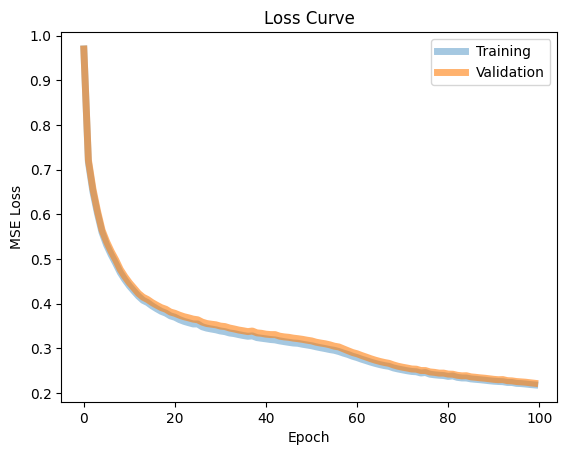

In [161]:
dataset_path = 'dataset_CLA_nonaugmented.pkl'
training_settings_json = 'TRAINING_SETTINGS/auto_encoder_pre_training/test.json'

CAE = ConvolutionalAutoEncoder(dataset_path,training_settings_json)
CAE.build_encoder()
CAE.build_decoder()
CAE.build_auto_encoder()

optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.MeanSquaredError()

CAE.compile_auto_encoder(loss,optimizer)

experiment_dir = 'Experiments/Simplest Model + Conv. layer activations with BN'

CAE.train(save_experiment=True,experiment_dir = experiment_dir,model_name = 'auto_encoder.keras')

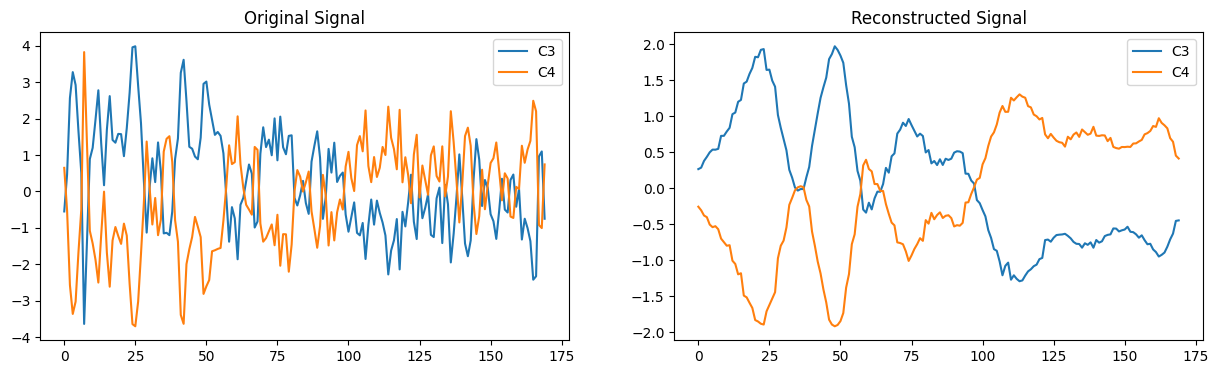

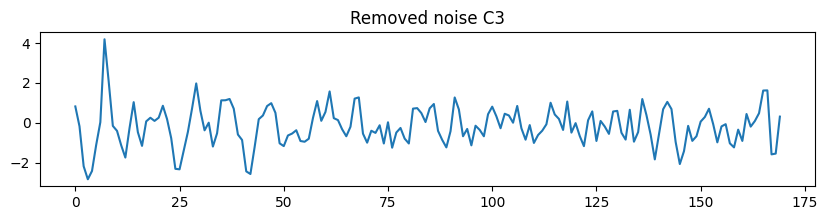

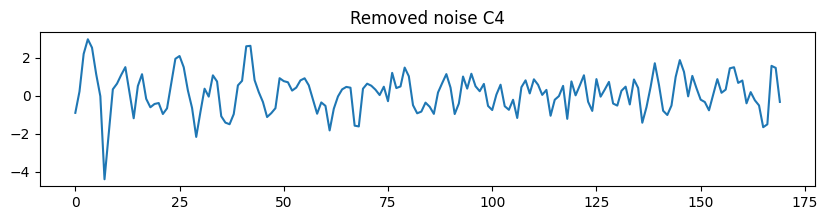

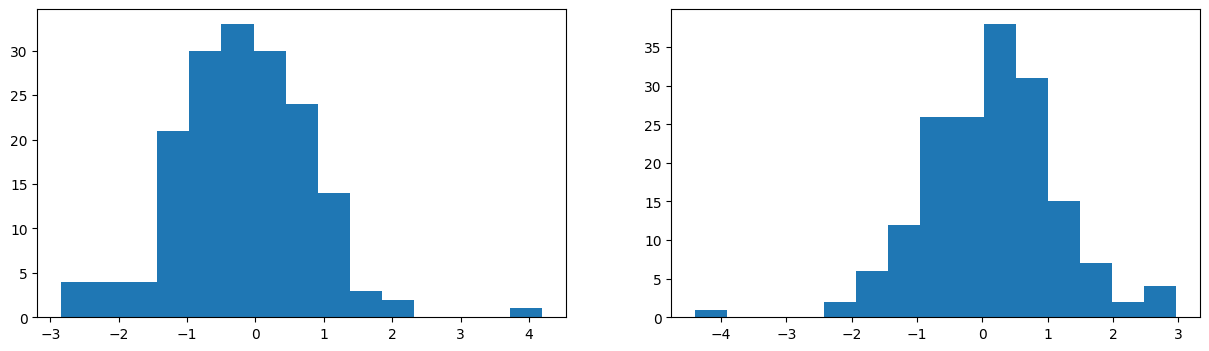

In [189]:
CAE.show_random_reconstruction()

In [190]:
embeddings = CAE.encoder(CAE.training_trials)

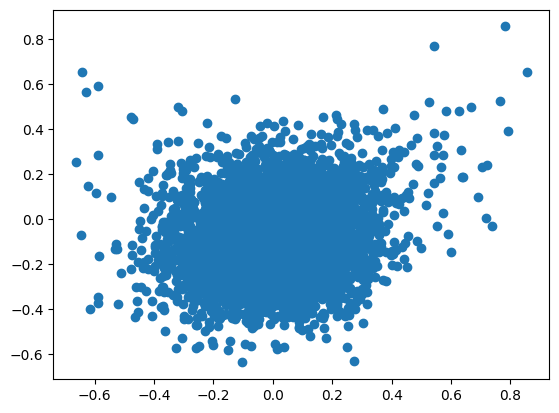

In [192]:
plt.scatter(embeddings[:,0],embeddings[:,3])

### DEC Training

In [178]:
from src.models.DEC import DeepEmbeddedClustering

In [179]:
DEC_TRAINING_SETTINGS_JSON = 'TRAINING_SETTINGS/dec_training/test.json'
experiment_dir = 'Experiments/Simplest Model + Conv. layer activations with BN'

DEC = DeepEmbeddedClustering(dataset_path,DEC_TRAINING_SETTINGS_JSON,experiment_dir)

In [180]:
DEC.load_auto_encoder()
DEC.extract_encoder()

In [187]:
initial_embeddings = DEC.get_embeddings(DEC.training_trials)
DEC.initialize_cluster_centers(initial_embeddings)

C:\Users\20gun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [183]:
loss = tf.keras.losses.KLDivergence()
optimizer = tf.keras.optimizers.SGD()

DEC.compile_encoder(loss,optimizer)

In [188]:
DEC.evaluate_training_accuracy()

0.44601412714429867

In [106]:
DEC.train()

Initial training accuracy (by soft assignments): 0.6236125126135217
Initial validation accuracy (by soft assignments): 0.6124305204648812

Training steps per epoch: ~55



  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.004341911990195513
Validation loss: 0.00428285077214241

Training accuracy (by soft assignments): 0.6246215943491423
Validation accuracy (by soft assignments): 0.6088933804951996


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.004714522045105696
Validation loss: 0.004651200491935015

Training accuracy (by soft assignments): 0.6286579212916246
Validation accuracy (by soft assignments): 0.6068721576553815


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.005098164547234774
Validation loss: 0.005030756816267967

Training accuracy (by soft assignments): 0.6286579212916246
Validation accuracy (by soft assignments): 0.6104092976250631


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0054878005757927895
Validation loss: 0.005416462663561106

Training accuracy (by soft assignments): 0.6306760847628657
Validation accuracy (by soft assignments): 0.6129358261748358


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.00587688060477376
Validation loss: 0.005801893770694733

Training accuracy (by soft assignments): 0.6286579212916246
Validation accuracy (by soft assignments): 0.6124305204648812


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.006257974077016115
Validation loss: 0.006179721560329199

Training accuracy (by soft assignments): 0.6306760847628657
Validation accuracy (by soft assignments): 0.6129358261748358


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.00662235077470541
Validation loss: 0.006541358307003975

Training accuracy (by soft assignments): 0.6286579212916246
Validation accuracy (by soft assignments): 0.6119252147549268


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.006960195954889059
Validation loss: 0.006877260748296976

Training accuracy (by soft assignments): 0.6306760847628657
Validation accuracy (by soft assignments): 0.6114199090449722


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.007261536084115505
Validation loss: 0.007177668623626232

Training accuracy (by soft assignments): 0.6286579212916246
Validation accuracy (by soft assignments): 0.6119252147549268


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.007516984362155199
Validation loss: 0.007433032151311636

Training accuracy (by soft assignments): 0.6256306760847629
Validation accuracy (by soft assignments): 0.6088933804951996


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.0077176401391625404
Validation loss: 0.0076349880546331406

Training accuracy (by soft assignments): 0.6185671039354188
Validation accuracy (by soft assignments): 0.6018191005558363


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.007856716401875019
Validation loss: 0.0077765705063939095

Training accuracy (by soft assignments): 0.6125126135216953
Validation accuracy (by soft assignments): 0.595755432036382


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.00792965479195118
Validation loss: 0.007853264920413494

Training accuracy (by soft assignments): 0.6024217961654894
Validation accuracy (by soft assignments): 0.5907023749368367


  0%|          | 0/55 [00:00<?, ? batch/s]

Training loss: 0.007934815250337124
Validation loss: 0.007863825187087059

Training accuracy (by soft assignments): 0.5893037336024218
Validation accuracy (by soft assignments): 0.5907023749368367


  0%|          | 0/55 [00:00<?, ? batch/s]

KeyboardInterrupt: 

In [ ]:
training_embeddings = DEC.get_embeddings(DEC.training_trials)

In [ ]:
plt.scatter(training_embeddings[:,0],training_embeddings[:,8])
plt.scatter(DEC.cluster_centers[0][0],DEC.cluster_centers[0][1],alpha=0.5)
plt.scatter(DEC.cluster_centers[1][8],DEC.cluster_centers[1][8],alpha=0.5)

In [ ]:
DEC.cluster_centers[0]